/home/tatatupi/labNS/spectralunmixer/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/tatatupi/labNS/spectralunmixer/env/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/tatatupi/labNS/spectralunmixer/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


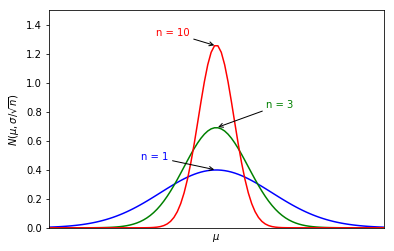

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
n1 = 1
n2 = math.sqrt(3)
n3 = math.sqrt(10)

variance = 1

sigma = math.sqrt(variance)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

f = plt.figure()
plt.plot(x,mlab.normpdf(x, mu, sigma), color = 'blue')
plt.plot(x,mlab.normpdf(x, mu, sigma/n2), color = 'green')
plt.plot(x,mlab.normpdf(x, mu, sigma/n3), color = 'red')

plt.annotate('n = 10',
            xy=(0, 1.255), xycoords='data', color='red',
            xytext=(-60, 10), textcoords='offset points',
            arrowprops=dict(facecolor='green',arrowstyle="->"))

plt.annotate('n = 3',
            xy=(0, 0.69), xycoords='data', color='green',
            xytext=(50, 20), textcoords='offset points',
            arrowprops=dict(facecolor='orange',arrowstyle="->"))

plt.annotate('n = 1',
            xy=(0, 0.39876), xycoords='data', color='blue',
            xytext=(-75, 10), textcoords='offset points',
            arrowprops=dict(facecolor='blue',arrowstyle="->"))
plt.axis((-3,3,0,1.5))
plt.xlabel(r'$\mu$')
plt.ylabel(r'$N(\mu,\sigma/ \sqrt{n})$')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
plt.show()
f.savefig('fusion_accuracy.pdf')

In [48]:
from collections import namedtuple
import filterpy.stats as stats


def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

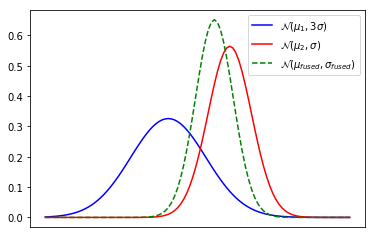

In [63]:

g1, g2 = gaussian(4, 1.5), gaussian(6, 0.5)

f = plt.figure()
product = gaussian_multiply(g1, g2)

xs = np.arange(0, 10, 0.1)
ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_1,3\sigma)$', color = 'blue')

ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_2,\sigma)$', color = 'red')

ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_{fused},\sigma_{fused})$', ls='--', color = 'green')
plt.legend();
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])

f.savefig('gauss_fusion1.pdf')

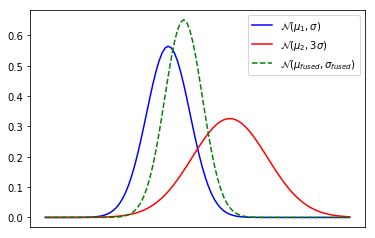

In [62]:
g1, g2 = gaussian(4, 0.5), gaussian(6, 1.5)
f = plt.figure()
product = gaussian_multiply(g1, g2)

xs = np.arange(0, 10, 0.1)
ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_1,\sigma)$', color = 'blue')

ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_2,3\sigma)$', color = 'red')

ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}$'+'$(\mu_{fused},\sigma_{fused})$', ls='--', color = 'green')
plt.legend();
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])

f.savefig('gauss_fusion2.pdf')

In [8]:
def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

In [15]:
def plot_products(g1, g2): 
    plt.figure()
    product = gaussian_multiply(g1, g2)

    xs = np.arange(5, 15, 0.1)
    ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g1.mean, g1.var))

    ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g2.mean, g2.var))

    ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.legend();